In [1]:
import pandas as pd
import math

In [2]:
# dataset source: https://github.com/davestroud/BeerStudy/blob/master/Beers.csv
beers = pd.read_csv("Beers.csv")

# IBU

We are going to focus on international bitternes unit (ibu) score on two different samples

In [3]:
beers = beers[~beers["IBU"].isna()]

In [4]:
beers.head()

,Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces
14,Bitter Bitch,1979,0.061,60.0,178,American Pale Ale (APA),12.0
21,Lower De Boom,1036,0.099,92.0,369,American Barleywine,8.4
22,Fireside Chat,1024,0.079,45.0,369,Winter Warmer,12.0
24,Bitter American,876,0.044,42.0,369,American Pale Ale (APA),12.0
25,Hell or High Watermelon Wheat (2009),802,0.049,17.0,369,Fruit / Vegetable Beer,12.0


In [5]:
#list(beers["Style"].unique())

# Collect two independent samples

They should have normal distribution

They should be same sized samples

In [6]:
sample_one_type = "Czech Pilsener"
sample_two_type = "American Pale Ale (APA)"

sample_size = 10

I will drink 10 pilsener and ale beers randomly and compare their bitterness

The question is that is there a difference on the bitterness between those two samples

In [7]:
sample_one = beers[beers["Style"] == sample_one_type]["IBU"].sample(sample_size, random_state = 17)

In [8]:
sample_two = beers[beers["Style"] == sample_two_type]["IBU"].sample(sample_size, random_state = 17)

<AxesSubplot:title={'center':'IBU'}, ylabel='Density'>

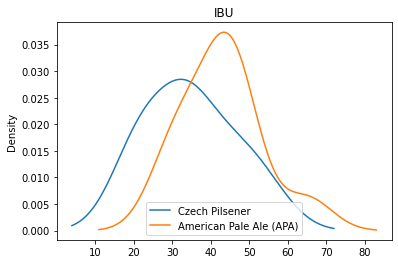

In [9]:
sample_one.plot(kind='kde', title = 'IBU', label = sample_one_type, legend = True)
sample_two.plot(kind='kde', title = 'IBU', label = sample_two_type, legend = True)

In [10]:
sample_one.mean()

34.9

In [11]:
sample_two.mean()

42.9

In [12]:
t_value = abs(sample_one.mean() - sample_two.mean()) 
t_value = t_value / math.sqrt(((sample_two.std() ** 2) 
                               / sample_two.shape[0]) + ((sample_one.std() ** 2) / sample_one.shape[0]))

In [13]:
t_value

1.63005266343755

# T-distribution

In [14]:
# dataset source: https://github.com/serengil/tensorflow-101/blob/master/dataset/t_distribution.csv
t_dist = pd.read_csv("t_distribution.csv")

In [22]:
t_dist.head()

,degrees_of_freedom,p_0.20,p_0.10,p_0.05,p_0.02,p_0.01,p_0.005,p_0.002,p_0.001
0,1.0,3.078,6.314,12.706,31.820,63.657,127.321,318.309,636.619
1,2.0,1.886,2.920,4.303,6.965,9.925,14.089,22.327,31.599
2,3.0,1.638,2.353,3.182,4.541,5.841,7.453,10.215,12.924
3,4.0,1.533,2.132,2.776,3.747,4.604,5.598,7.173,8.610
4,5.0,1.476,2.015,2.571,3.365,4.032,4.773,5.893,6.869


In [16]:
degree_of_freedom = sample_one.shape[0] + sample_two.shape[0] - 2

In [17]:
degree_of_freedom

18

In [18]:
t_dist[t_dist["degrees_of_freedom"] == degree_of_freedom]

,degrees_of_freedom,p_0.20,p_0.10,p_0.05,p_0.02,p_0.01,p_0.005,p_0.002,p_0.001
17,18.0,1.33,1.734,2.101,2.552,2.878,3.197,3.61,3.922


# Threshold

Get the threshold value for a confidence level. In science, we mostly use 0.05.

In [19]:
threshold = t_dist[t_dist["degrees_of_freedom"] == degree_of_freedom]["p_0.05"].values[0]

In [20]:
threshold

2.101

# Hypothesis

In [21]:
if t_value < threshold:
    print("there is no statistically significant difference between the samples")
else:
    print("there is statistically significant difference between the samples")

there is no statistically significant difference between the samples
